## Euclidean Distance
There are various ways to compute distance on a plane, but the most accepted version is Euclidean Distance.

It's named after Euclid, a famous mathematician who is popularly referred to as the father of Geometry.

The equation: 
1. Compute the distance between points (x1 - x2), (y1 - y2)
2. Square the distances and add them together (x1 - x2)^2 + (y1 - y2)^2
3. Get the square root of this number

This is the same formula used in Pythagorean theorem, where the square of the hypotenuse (the side opposite the right angle) is equal to the sum of the squares of the other two sides. a2 + b2 = c2

## K-Nearest Neighbors
K-Nearest Neighbors is about proximity, not by group, but by individual points. We are finding the "nearest" neighbors to a target point P.

The algorithm:
1. Calculate the Euclidean Distance between all points and the target P.
2. Sort the distances by increasing order (smallest at the start).
3. Get the first K distances.



In [3]:
from math import sqrt

plot1 = [1,3]
plot2 = [2,5]
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )

print(euclidean_distance)

2.23606797749979


In [4]:
import numpy as np
from math import sqrt
from collections import Counter
import warnings

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [10]:
# They keys are the color of the points, and can be thought of as the Class.
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}

# This is the data that we want to test:
new_features = [5,7]

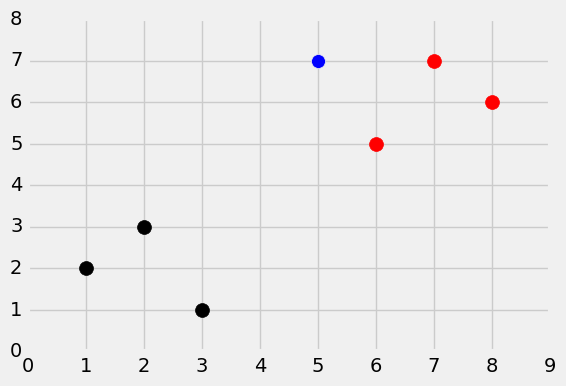

In [11]:
[[plt.scatter(j[0], j[1], s=100, color=i) for j in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()

The blue dot is the new_features, which we're going to attempt to classify.

In [53]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than the length of the data.')

    distances = []
    for group in data:
        for features in data[group]:
            
            # euclidean_distance = sqrt( (features[0]-predict[0])**2 + (features[1]-predict[1])**2 )
            
            # While the above is arguably the clearest implementation, we can speed things up quite a bit with Numpy.
            euclidean_distance = np.sqrt(np.sum((np.array(features) - np.array(predict))**2))
            
            distances.append([euclidean_distance,group])
    
    print(distances)

We loop over the groups, calculating the distance, labelling the distance with the group, ('r' for red, 'k' for black) for each point and adding it to the distances array. The function isn't complete, but let's take a look at what it's doing already.

In [49]:
k_nearest_neighbors(dataset, new_features)

[[2.2360679774997898, 'r'],
 [2.0, 'r'],
 [3.1622776601683795, 'r'],
 [6.4031242374328485, 'k'],
 [5.0, 'k'],
 [6.324555320336759, 'k']]

If you're unsure about the Numpy syntax above, the following should help:

In [26]:
a, b = [3,4], [2,3]

# These two expressions are equivalent
(a[0] - b[0]) + (a[1] - b[1])

np.sum(np.array(a) - np.array(b))

2

## Norm vs Distance

Turns out Numpy has some useful linear algebra functions built-in!

**Euclidean Distance** is the name for measuring the length of a line segment between points. 

**Euclidean Norm** measures the magnitude (length) of a vector.

The equations are the same. The name just tells you in what space you're using the equation.

In [55]:
distances = np.array([[5,2],[6,3],[3,1]]) - np.array([2,2])
euclidean_distance = np.sqrt(np.sum(distances**2))
print(euclidean_distance)

euclidean_norm = np.linalg.norm(distances)
print(euclidean_norm)

5.29150262213
5.29150262213


## Let's complete the function

In [63]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            # Note we are now using the Euclidean Norm algorithm
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    # We sort the distances and take the first k elements
    distances = sorted(distances)[:k]
    
    # We only need the class, e.g 'r' not the distance
    votes = [i[1] for i in distances]
    
    # We return the most common class
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

## Testing time!

1. Declare the dataset and the new_features again for clarity.
2. Plot the dataset.
3. Predict the class (color) that new_features belongs to.
4. Plot new features with the predicted color.

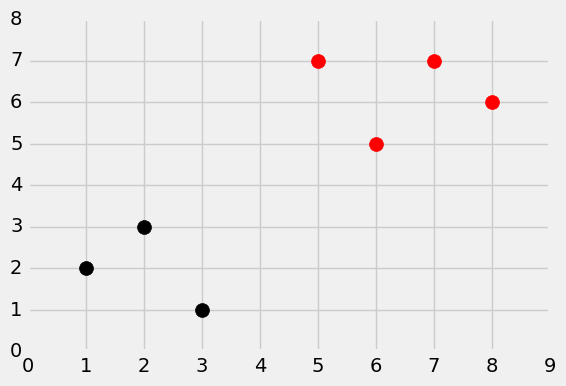

In [64]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
        
result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

### Test again!

Let's test with a different point.

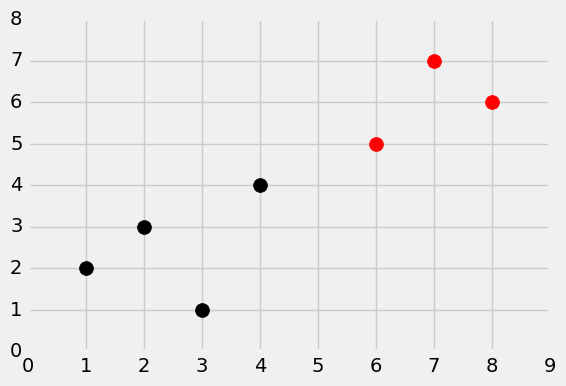

In [72]:
new_features = [4,4]
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
        
result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

# Real data

Let's revisit the breast cancer dataset that tracked tumor attributes and classified them as benign or malignant. 

The Scikit-Learn K Nearest Neighbors gave us ~95% accuracy on average, and now we're going to test our own algorithm.

In [80]:
import pandas as pd
import random

df = pd.read_csv('data/breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

In [83]:
random.shuffle(full_data)

test_size = 0.2 # 20%

# 2 is the class that refers to benign tumors
# 4 refers to malignant tumors
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}


# First 80% of the shuffled data
train_data = full_data[:-int(test_size*len(full_data))]

# Remaining 20% of the shuffled data
test_data = full_data[-int(test_size*len(full_data)):]


# Add the data to the dictionaries
for i in train_data:
    cls = i[-1] # last column
    train_set[cls].append(i[:-1]) # append all but the last column

for i in test_data:
    cls = i[-1]
    test_set[cls].append(i[:-1])

## Training and testing time!

KNN

**Training:** Simply having the train_data points in memory

**Testing:** Comparing distances and seeing if it classified correctly


1. Iterate through the the classes (2 or 4) in the test set
2. Iterate through each datapoint
3. Feed that datapoint to k_nearest_neighbors, with training data, and then our choice for k, which is 5. 
4. I chose 5 purely because that's the default for the Scikit Learn KNeighborsClassifier.

In [86]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1

print('Correct:', correct)
print('Total:', total)
print('Accuracy:', correct/total)

Correct: 134
Total: 139
Accuracy: 0.9640287769784173
